In [52]:
dta = pd.read_csv('bajri1.csv')

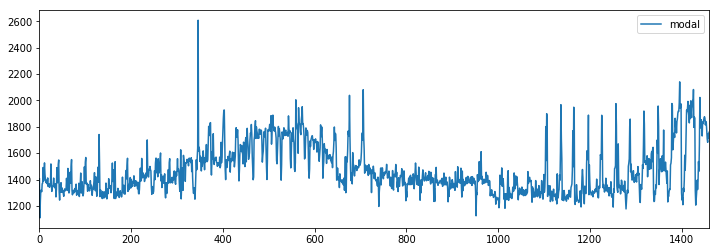

In [53]:
dta.plot(figsize=(12,4))
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [54]:
#split into test and train
percentage = 0.6
series = dta['modal'].tolist()
size = int(len(series) * 0.8)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (0,1,1))
model_fit = model.fit()

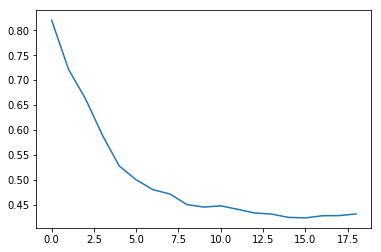

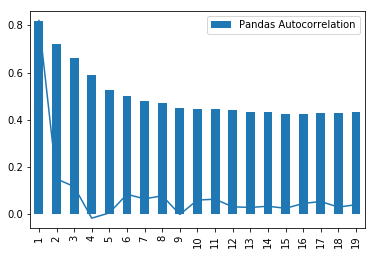

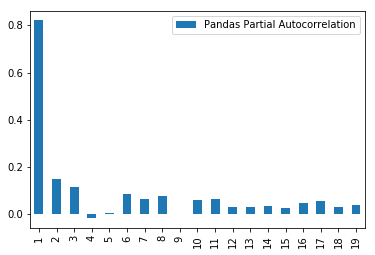

In [55]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

predicted=1434.258702, expected=1211.000000
predicted=1336.715103, expected=1261.000000
predicted=1277.790952, expected=1235.000000
predicted=1264.333605, expected=1361.000000
predicted=1347.889684, expected=1289.000000
predicted=1312.594026, expected=1246.000000
predicted=1292.905796, expected=1244.000000
predicted=1277.953353, expected=1233.000000
predicted=1265.331146, expected=1226.000000
predicted=1259.338474, expected=1234.000000
predicted=1262.232603, expected=1256.000000
predicted=1276.192870, expected=1314.000000
predicted=1316.505004, expected=1235.000000
predicted=1275.186616, expected=1192.000000
predicted=1246.295602, expected=1302.000000
predicted=1301.825552, expected=1423.000000
predicted=1385.534950, expected=1476.000000
predicted=1446.161977, expected=1412.000000
predicted=1425.937243, expected=1293.000000
predicted=1349.775477, expected=1292.000000
predicted=1328.534447, expected=1216.000000
predicted=1264.984907, expected=1350.000000
predicted=1342.462295, expected=

predicted=1497.397621, expected=1461.000000
predicted=1474.257675, expected=1459.000000
predicted=1463.092509, expected=1580.000000
predicted=1536.757473, expected=1464.000000
predicted=1470.592956, expected=1525.000000
predicted=1515.705860, expected=1775.000000
predicted=1668.895547, expected=1489.000000
predicted=1510.201245, expected=1473.000000
predicted=1508.588758, expected=1465.000000
predicted=1466.602976, expected=1532.000000
predicted=1507.351508, expected=1480.000000
predicted=1477.945440, expected=1436.000000
predicted=1453.725307, expected=1371.000000
predicted=1401.818492, expected=1465.000000
predicted=1452.159046, expected=1230.000000
predicted=1299.795458, expected=1278.000000
predicted=1323.646845, expected=1272.000000
predicted=1294.667019, expected=1312.000000
predicted=1325.887708, expected=1326.000000
predicted=1337.380294, expected=1324.000000
predicted=1342.065058, expected=1511.000000
predicted=1464.430363, expected=1524.000000
predicted=1487.577780, expected=

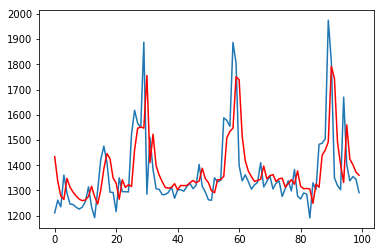

In [57]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(3,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)
plt.plot(test[:100])
plt.plot(predicted1[:100], color='red')
plt.show()

In [58]:
from math import sqrt
error = sqrt(mean_squared_error(test, predicted1))
print('Test RMSE: %.3f' % error)

Test RMSE: 129.606


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1168
Model:                     ARMA(9, 0)   Log Likelihood               -6932.465
Method:                       css-mle   S.D. of innovations             91.445
Date:                Sat, 30 Mar 2019   AIC                          13886.930
Time:                        12:19:41   BIC                          13942.624
Sample:                             0   HQIC                         13907.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1456.6913     31.968     45.567      0.000    1394.035    1519.347
ar.L1.y        0.5818      0.030     19.581      0.000       0.524       0.640
ar.L2.y        0.1000      0.035      2.890      0.0

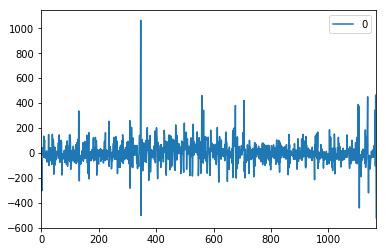

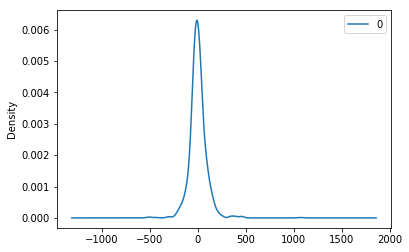

                 0
count  1168.000000
mean      0.375706
std      91.536557
min    -522.172506
25%     -42.998964
50%      -5.946667
75%      37.082891
max    1064.579987


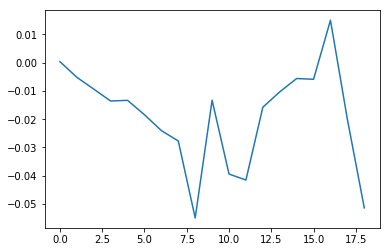

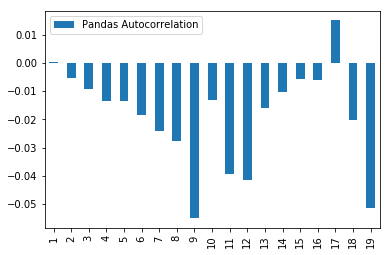

In [59]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(9,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

In [60]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model = Sequential()
    model.add(Dense(50, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(25, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [61]:
model = make_model(50)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)
#test = np.array(test).reshape(-1,1)
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
train_scaled = min_max_scaler.fit_transform(test_data) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split=0.05)

/home/rushikesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=50, activation="tanh", kernel_initializer="uniform")`
  
/home/rushikesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/rushikesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 278 samples, validate on 15 samples
Epoch 1/500
278/278 [==============================] - 0s 1ms/step - loss: 0.0726 - val_loss: 0.0587
Epoch 2/500
278/278 [==============================] - 0s 9us/step - loss: 0.0550 - val_loss: 0.0419
Epoch 3/500
278/278 [==============================] - 0s 12us/step - loss: 0.0380 - val_loss: 0.0255
Epoch 4/500
278/278 [==============================] - 0s 8us/step - loss: 0.0229 - val_loss: 0.0128
Epoch 5/500
278/278 [==============================] - 0s 29us/step - loss: 0.0133 - val_loss: 0.0045
Epoch 6/500
278/278 [==============================] - 0s 11us/step - loss: 0.0099 - val_loss: 8.4338e-04
Epoch 7/500
278/278 [==============================] - 0s 39us/step - loss: 0.0122 - val_loss: 5.5901e-04
Epoch 8/500
278/278 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0011
Epoch 9/500
278/278 [==============================] - 0s 30us/step - loss: 0.0192 - val_loss: 0.0010
Epoch 10/500
278/278 [==========

Epoch 79/500
278/278 [==============================] - 0s 16us/step - loss: 0.0029 - val_loss: 4.3921e-04
Epoch 80/500
278/278 [==============================] - 0s 20us/step - loss: 0.0029 - val_loss: 4.3792e-04
Epoch 81/500
278/278 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 4.4327e-04
Epoch 82/500
278/278 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 4.5440e-04
Epoch 83/500
278/278 [==============================] - 0s 28us/step - loss: 0.0029 - val_loss: 4.6978e-04
Epoch 84/500
278/278 [==============================] - 0s 24us/step - loss: 0.0028 - val_loss: 4.8674e-04
Epoch 85/500
278/278 [==============================] - 0s 27us/step - loss: 0.0028 - val_loss: 5.0181e-04
Epoch 86/500
278/278 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 5.1168e-04
Epoch 87/500
278/278 [==============================] - 0s 10us/step - loss: 0.0028 - val_loss: 5.1445e-04
Epoch 88/500
278/278 [===============

278/278 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 6.5364e-04
Epoch 156/500
278/278 [==============================] - 0s 19us/step - loss: 0.0023 - val_loss: 6.5645e-04
Epoch 157/500
278/278 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 6.5886e-04
Epoch 158/500
278/278 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 6.6109e-04
Epoch 159/500
278/278 [==============================] - 0s 24us/step - loss: 0.0023 - val_loss: 6.6344e-04
Epoch 160/500
278/278 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 6.6611e-04
Epoch 161/500
278/278 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 6.6918e-04
Epoch 162/500
278/278 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 6.7258e-04
Epoch 163/500
278/278 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 6.7608e-04
Epoch 164/500
278/278 [===================

278/278 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 8.8276e-04
Epoch 232/500
278/278 [==============================] - 0s 25us/step - loss: 0.0021 - val_loss: 8.8588e-04
Epoch 233/500
278/278 [==============================] - 0s 22us/step - loss: 0.0021 - val_loss: 8.8900e-04
Epoch 234/500
278/278 [==============================] - 0s 17us/step - loss: 0.0021 - val_loss: 8.9213e-04
Epoch 235/500
278/278 [==============================] - 0s 25us/step - loss: 0.0021 - val_loss: 8.9528e-04
Epoch 236/500
278/278 [==============================] - 0s 26us/step - loss: 0.0021 - val_loss: 8.9844e-04
Epoch 237/500
278/278 [==============================] - 0s 21us/step - loss: 0.0021 - val_loss: 9.0160e-04
Epoch 238/500
278/278 [==============================] - 0s 30us/step - loss: 0.0021 - val_loss: 9.0476e-04
Epoch 239/500
278/278 [==============================] - 0s 36us/step - loss: 0.0021 - val_loss: 9.0791e-04
Epoch 240/500
278/278 [===================

Epoch 309/500
278/278 [==============================] - 0s 18us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 310/500
278/278 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 311/500
278/278 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 312/500
278/278 [==============================] - 0s 11us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 313/500
278/278 [==============================] - 0s 14us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 314/500
278/278 [==============================] - 0s 15us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 315/500
278/278 [==============================] - 0s 9us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 316/500
278/278 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 317/500
278/278 [==============================] - 0s 22us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 318/500
278/278 [==============================] - 0s 11us/

Epoch 388/500
278/278 [==============================] - 0s 17us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 389/500
278/278 [==============================] - 0s 16us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 390/500
278/278 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 391/500
278/278 [==============================] - 0s 15us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 392/500
278/278 [==============================] - 0s 21us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 393/500
278/278 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 394/500
278/278 [==============================] - 0s 17us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 395/500
278/278 [==============================] - 0s 17us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 396/500
278/278 [==============================] - 0s 15us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 397/500
278/278 [==============================] - 0s 23us

Epoch 467/500
278/278 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 468/500
278/278 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 469/500
278/278 [==============================] - 0s 16us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 470/500
278/278 [==============================] - 0s 10us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 471/500
278/278 [==============================] - 0s 16us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 472/500
278/278 [==============================] - 0s 17us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 473/500
278/278 [==============================] - 0s 28us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 474/500
278/278 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 475/500
278/278 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 476/500
278/278 [==============================] - 0s 23us

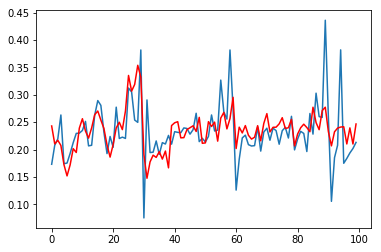

Test RMSE: 113.272


In [62]:
test_extended = train.tolist()[-1*window_size:] + test_resid
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_train_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(new_train_Y)
pred = pd.DataFrame(predictions)
plt.plot(Y[:100])
plt.plot(pred[:100] , color = 'r')
#p.plot()
plt.show()
error = sqrt(mse(test_resid,predictions_rescaled))
print('Test RMSE: %.3f' % error)

In [63]:
pred_final = predictions_rescaled + predicted1
error = sqrt(mse(test,pred_final))
print('Test RMSE: %.3f' % error)

Test RMSE: 113.272


Test RMSE: 113.272


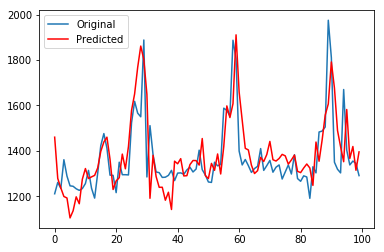

In [66]:
pred_final = predictions_rescaled + predicted1
error = sqrt(mse(test,pred_final))
print('Test RMSE: %.3f' % error)
Y = pd.DataFrame(test)
pred = pd.DataFrame(pred_final)
plt.plot(Y[:100], label="Original")
plt.plot(pred[:100] , label = "Predicted",color = 'r')
plt.legend()
#p.plot()
plt.show()